In [ ]:
#in chemiometrics, loads and scores are used conventionally instead of eigevnalues and vectors
#model$eigenvals = 
#         c(model$eigenvals, svd(x.cal - tcrossprod(res$scores, res$loadings))$d^2/(nrows - 1))
# s = svd(x)
#   loadings = s$v[, 1:ncomp, drop = F]

# scores  = x %*% loadings


# NOT RUN {
#hilbert <- function(n) { i <- 1:n; 1 / outer(i - 1, i, "+") }
#X <- hilbert(9)[, 1:6]
#(s <- svd(X))
#D <- diag(s$d)
#s$u %*% D %*% t(s$v) #  X = U D V'
#t(s$u) %*% X %*% s$v #  D = U' X V
# }

In [3]:
from numpy.linalg import svd


In [50]:
X = [1/(i + (i-1)) for i in range(1,9+1,1)]




[1.0, 0.3333333333333333, 0.2, 0.14285714285714285, 0.1111111111111111]

In [71]:
X = [[1.0000000, 0.5000000, 0.33333333, 0.25000000, 0.20000000, 0.16666667],
[0.5000000, 0.3333333, 0.25000000, 0.20000000, 0.16666667, 0.14285714],
[0.3333333, 0.2500000, 0.20000000, 0.16666667, 0.14285714, 0.12500000],
[0.2500000, 0.2000000, 0.16666667, 0.14285714, 0.12500000, 0.11111111],
[0.2000000, 0.1666667, 0.14285714, 0.12500000, 0.11111111, 0.10000000],
[0.1666667, 0.1428571, 0.12500000, 0.11111111, 0.10000000, 0.09090909],
[0.1428571, 0.1250000, 0.11111111, 0.10000000, 0.09090909, 0.08333333],
[0.1250000, 0.1111111, 0.10000000, 0.09090909, 0.08333333, 0.07692308],
[0.1111111, 0.1000000, 0.09090909, 0.08333333, 0.07692308, 0.07142857]]



In [56]:
X = np.array(X)

In [32]:
import numpy as np
X = np.matrix(X)

In [74]:
u, s, vh = svd(X)
print(s) # 1.668433e+00 2.773727e-01 2.223722e-02 1.084693e-03 3.243788e-05

[1.66843318e+00 2.77372685e-01 2.22372135e-02 1.08467920e-03
 3.24363793e-05 5.18867569e-07]


In [61]:
d = np.diag(s)

In [45]:
X.shape, u.shape, s.shape, vh.shape

((9, 6), (9, 9), (6,), (6, 6))

In [72]:
smat = np.zeros((9, 6), dtype=complex)
smat[:6, :6] = np.diag(s)
X1 = np.dot(u, np.dot(smat, vh))

In [73]:
X1

array([[1.        +0.j, 0.5       +0.j, 0.33333333+0.j, 0.25      +0.j,
        0.2       +0.j, 0.16666667+0.j],
       [0.5       +0.j, 0.3333333 +0.j, 0.25      +0.j, 0.2       +0.j,
        0.16666667+0.j, 0.14285714+0.j],
       [0.3333333 +0.j, 0.25      +0.j, 0.2       +0.j, 0.16666667+0.j,
        0.14285714+0.j, 0.125     +0.j],
       [0.25      +0.j, 0.2       +0.j, 0.16666667+0.j, 0.14285714+0.j,
        0.125     +0.j, 0.11111111+0.j],
       [0.2       +0.j, 0.1666667 +0.j, 0.14285714+0.j, 0.125     +0.j,
        0.11111111+0.j, 0.1       +0.j],
       [0.1666667 +0.j, 0.1428571 +0.j, 0.125     +0.j, 0.11111111+0.j,
        0.1       +0.j, 0.09090909+0.j],
       [0.1428571 +0.j, 0.125     +0.j, 0.11111111+0.j, 0.1       +0.j,
        0.09090909+0.j, 0.08333333+0.j],
       [0.125     +0.j, 0.1111111 +0.j, 0.1       +0.j, 0.09090909+0.j,
        0.08333333+0.j, 0.07692308+0.j],
       [0.1111111 +0.j, 0.1       +0.j, 0.09090909+0.j, 0.08333333+0.j,
        0.07692308+0.j, 

In [123]:
vh[0:-1,0] #-0.7364928  0.6225002  0.2550021 -0.06976287  0.01328234 -0.001588146


array([-0.73649281, -0.62250017, -0.25500209,  0.06976294, -0.01328249])

In [76]:
vh.shape

(6, 6)

In [163]:
vhneg[:,0:] = vh[:,0:] * -1 #WTF
vhneg[0,1:] = vhneg[0,1:]*-1 
vht = vhneg.T
loadings = vht[:, 0:4]
print(loadings)

#           [,1]       [,2]       [,3]        [,4]
#[1,] -0.7364928  0.6225002  0.2550021 -0.06976287
#[2,] -0.4432826 -0.1818705 -0.6866860  0.50860089
#[3,] -0.3274789 -0.3508553 -0.2611139 -0.50473697
#[4,] -0.2626469 -0.3921783  0.1043599 -0.43747940
#[5,] -0.2204199 -0.3945644  0.3509658  0.01612426
#[6,] -0.1904420 -0.3831871  0.5110654  0.53856351

[[ 0.73649281  0.62250017  0.25500209 -0.06976294]
 [-0.44328257 -0.18187048 -0.68668571  0.5086004 ]
 [-0.32747889 -0.35085532 -0.2611142  -0.50473377]
 [-0.26264688 -0.39217826  0.10435977 -0.43748338]
 [-0.22041988 -0.39456441  0.35096584  0.01612534]
 [-0.19044204 -0.3831871   0.51106561  0.5385637 ]]


In [134]:

testr =  [[-1.2087798,  0.17379119,  0.006081880, -9.249069e-05],
 [-0.7143490, -0.03602464, -0.014297109,  5.970955e-04],
 [-0.5208823, -0.07776640, -0.007479098, -3.407889e-04],
 [-0.4135932, -0.08714730, -0.001541317, -4.845014e-04],
 [-0.3443279, -0.08711538,  0.002398508, -3.280291e-04],
 [-0.2955476, -0.08395538,  0.004915739, -9.807259e-05],
 [-0.2591832, -0.07980872,  0.006511230,  1.252964e-04],
 [-0.2309578, -0.07548971,  0.007512573,  3.179510e-04],
 [-0.2083772, -0.07131944,  0.008126046,  4.760136e-04]]

In [150]:
scores = X @ loadings
residuals = testr - scores
residuals

matrix([[-2.41755956e+00,  5.08122905e-10,  3.55845889e-09,
         -1.04311037e-09],
        [-1.42869800e+00, -4.47393395e-09, -1.91926260e-08,
          8.59941418e-09],
        [-1.04176459e+00,  2.45640497e-08,  1.18134301e-08,
         -7.84127463e-09],
        [-8.27186427e-01,  2.09424623e-09,  3.82309726e-09,
         -3.11457762e-09],
        [-6.88655765e-01,  9.08273876e-09,  2.49350003e-08,
         -2.04315057e-08],
        [-5.91095238e-01, -3.07800384e-08, -3.52158019e-08,
          2.35101553e-08],
        [-5.18366320e-01,  2.00592645e-08,  1.36828746e-08,
         -1.44702314e-09],
        [-4.61915605e-01, -2.82984479e-09, -6.85298438e-09,
          4.62240421e-09],
        [-4.16754409e-01,  4.26797546e-09,  3.70031155e-09,
         -6.54588902e-10]])

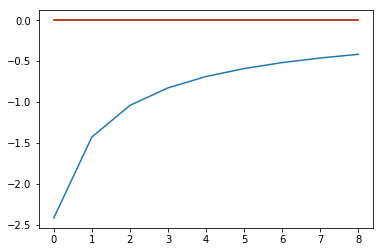

In [151]:
import matplotlib.pyplot as plt
plt.plot(residuals)
plt.show()
